<a href="https://colab.research.google.com/github/Jeetesh1512/learnML/blob/main/CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.datasets import cifar100

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [ ]:
augmenter = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True)
rescalator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator=augmenter.flow(X_train, y_train, batch_size=20)
valid_generator=rescalator.flow(X_valid, y_valid, batch_size=20)
test_generator=rescalator.flow(X_test, y_test, batch_size=20)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,263,140 (4.82 MB)

 Trainable params: 1,262,436 (4.82 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
EPOCHS=100
batch_size=20
steps_per_epoch=train_generator.n//batch_size
validation_steps=valid_generator.n//batch_size

history = model.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=EPOCHS,
                        validation_data=valid_generator,
                        validation_steps=validation_steps
                        )

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.4895 - loss: 1.8939 - val_accuracy: 0.4682 - val_loss: 2.1086
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.4998 - loss: 1.8512 - val_accuracy: 0.4398 - val_loss: 2.3395
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.5027 - loss: 1.8383 - val_accuracy: 0.4684 - val_loss: 2.0926
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.5104 - loss: 1.8271 - val_accuracy: 0.4638 - val_loss: 2.2039
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.5076 - loss: 1.8243 - val_accuracy: 0.4838 - val_loss: 2.0181
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5189 - loss: 1.7971 - val_accuracy: 0.4833 - val_loss: 2.0536
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5211 - loss: 1.7696 - val_accuracy: 0.4665 - val_loss: 2.2189
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 

In [ ]:
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

500/500 - 2s - 3ms/step - accuracy: 0.5110 - loss: 2.6705
test accuracy:  0.5109999775886536


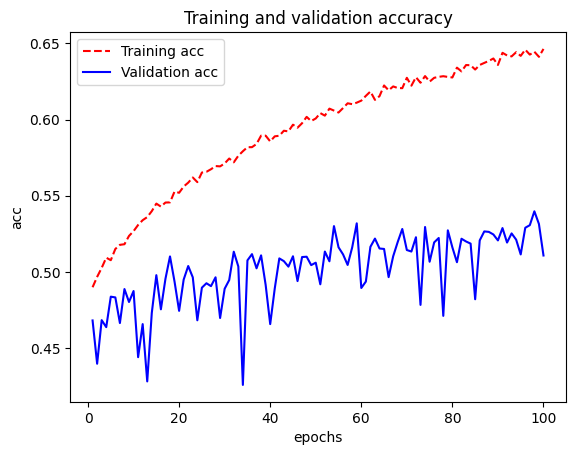

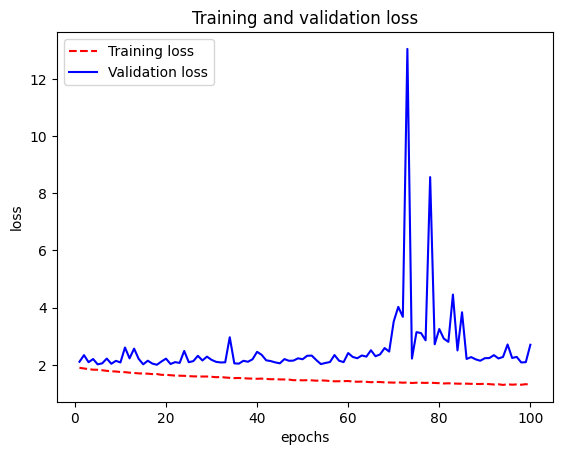

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_history(history)
test_loss,test_acc=model.evaluate(test_generator, verbose=2)
print("test accuracy: ",test_acc)